In [1]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd

wine_data = pd.read_csv('wine.csv')

# Data Undersatnding

In [2]:
wine_data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red


In [3]:
wine_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  type                  6497 non-null   object 
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


In [4]:
# Drop duplicate rows and rows with null values
wine_data.dropna(inplace=True)
wine_data.drop_duplicates(inplace=True)

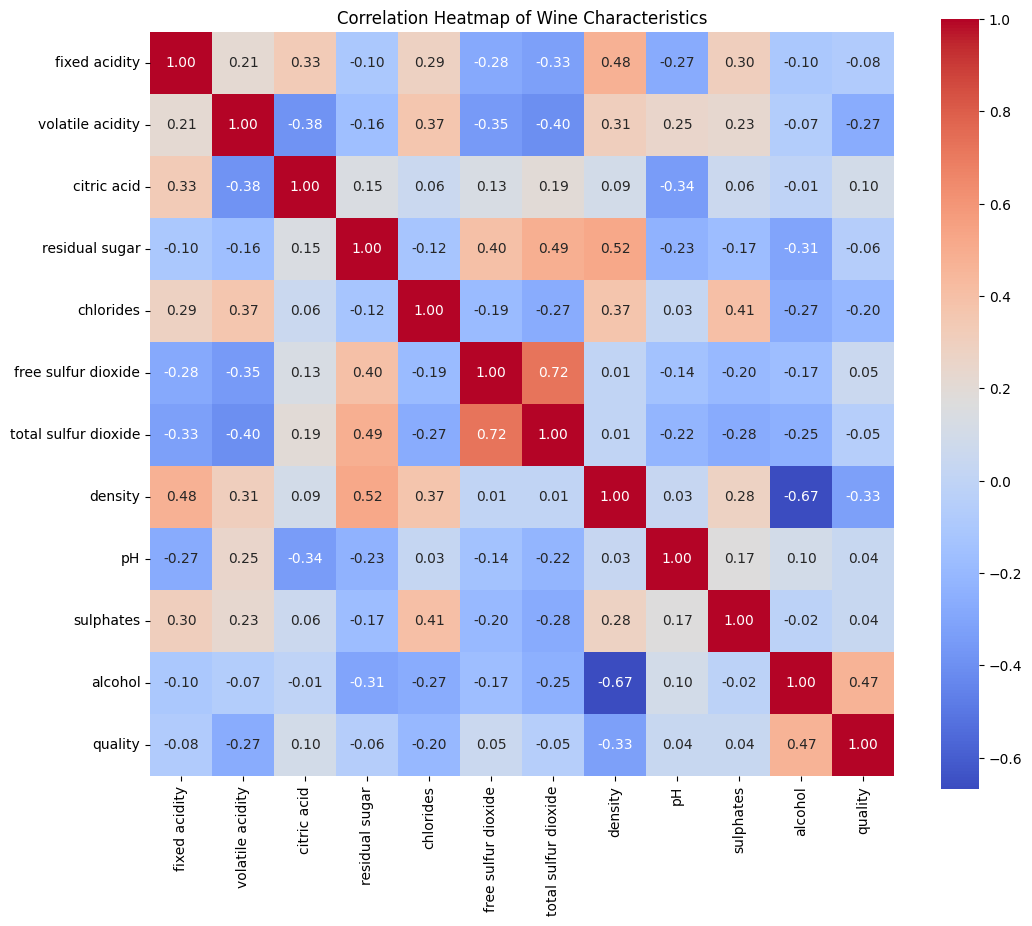

In [5]:
# Compute the correlation matrix
corr_matrix = wine_data.select_dtypes(include=[np.number]).corr()

# Generate a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True, square=True)
plt.title('Correlation Heatmap of Wine Characteristics')
plt.show()

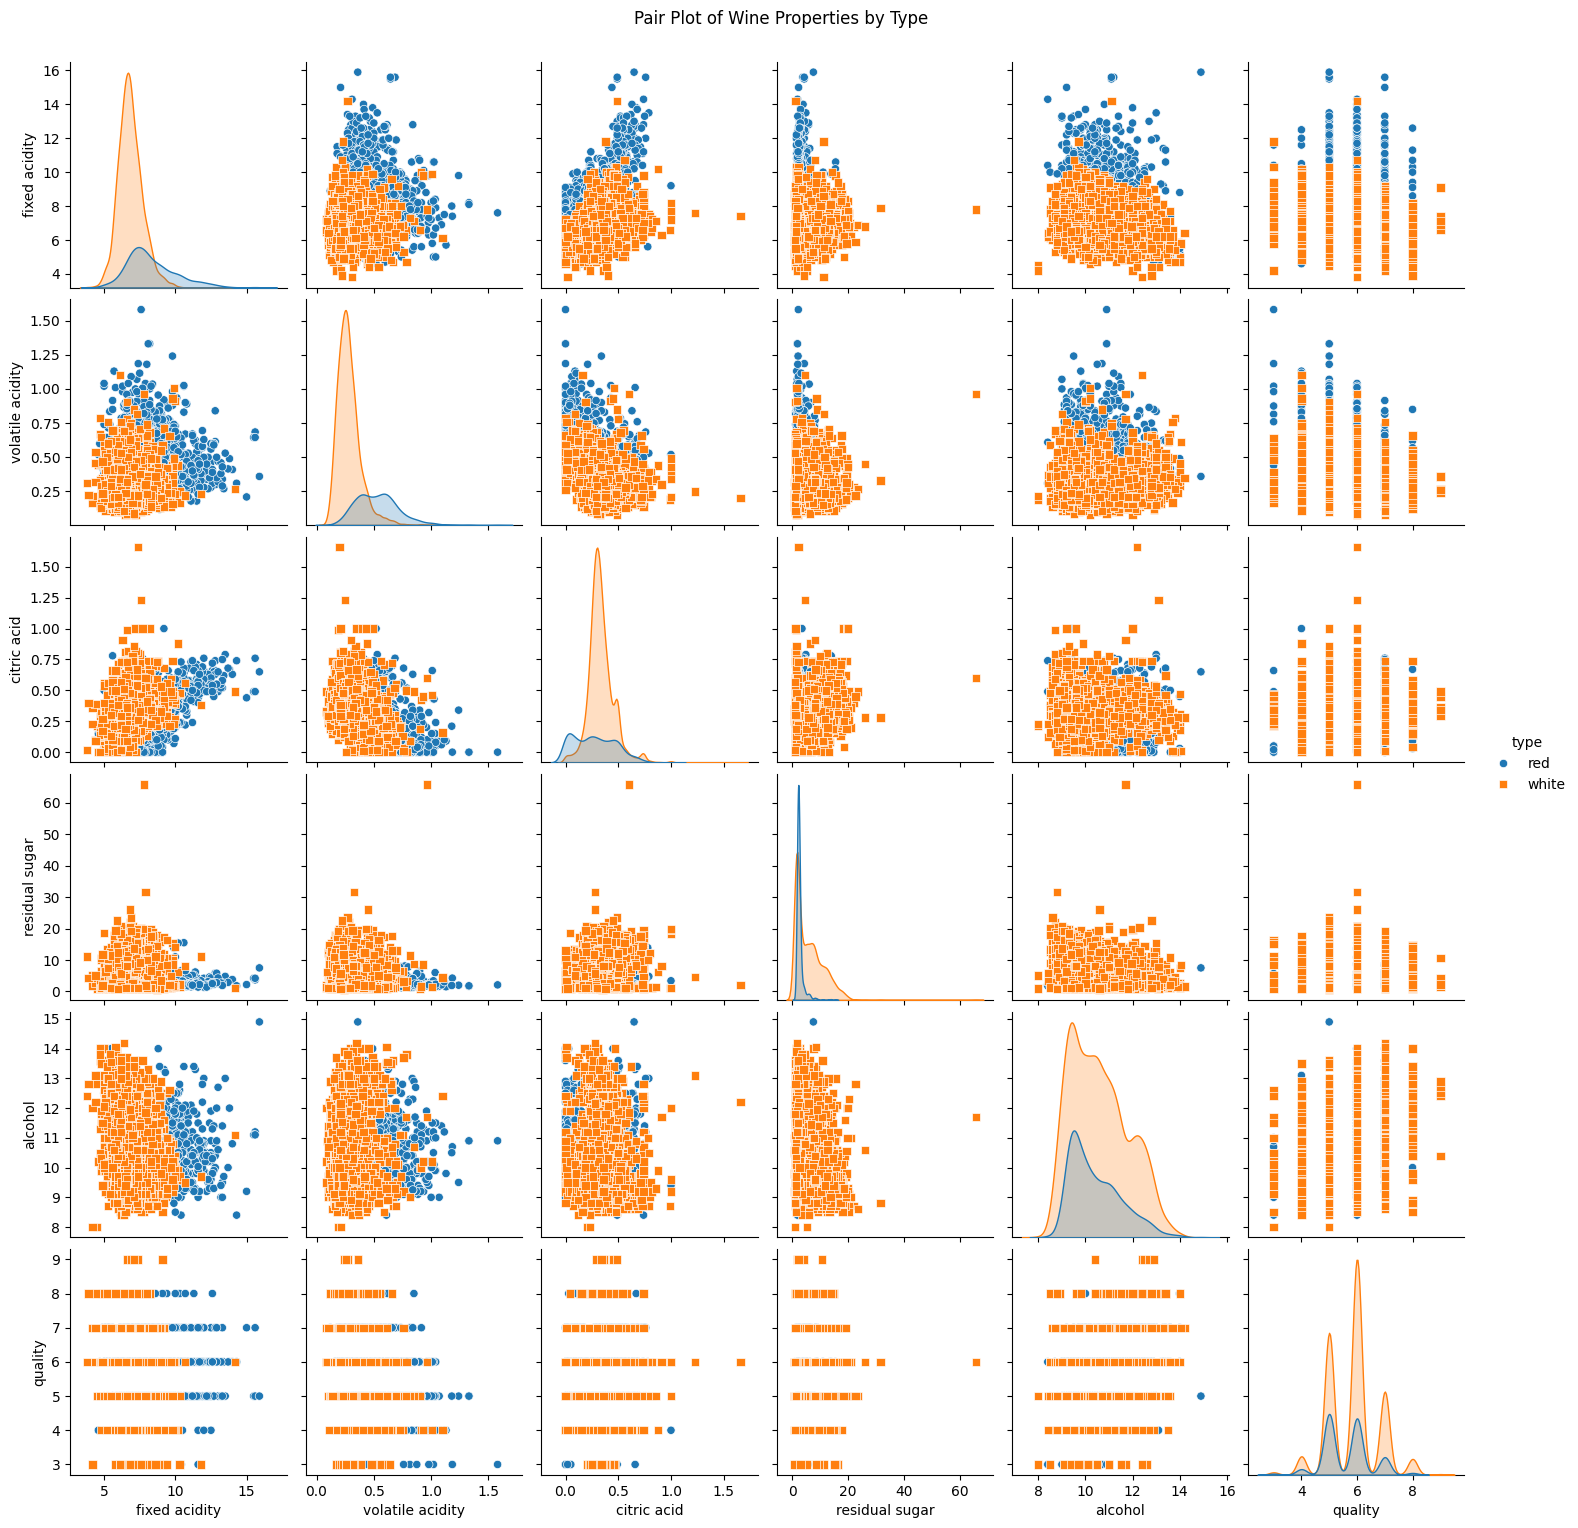

In [6]:
plot_columns = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'alcohol', 'quality', 'type']

sns.pairplot(wine_data[plot_columns], hue='type', markers=['o','s'])
plt.suptitle("Pair Plot of Wine Properties by Type", y=1.02)
plt.show()

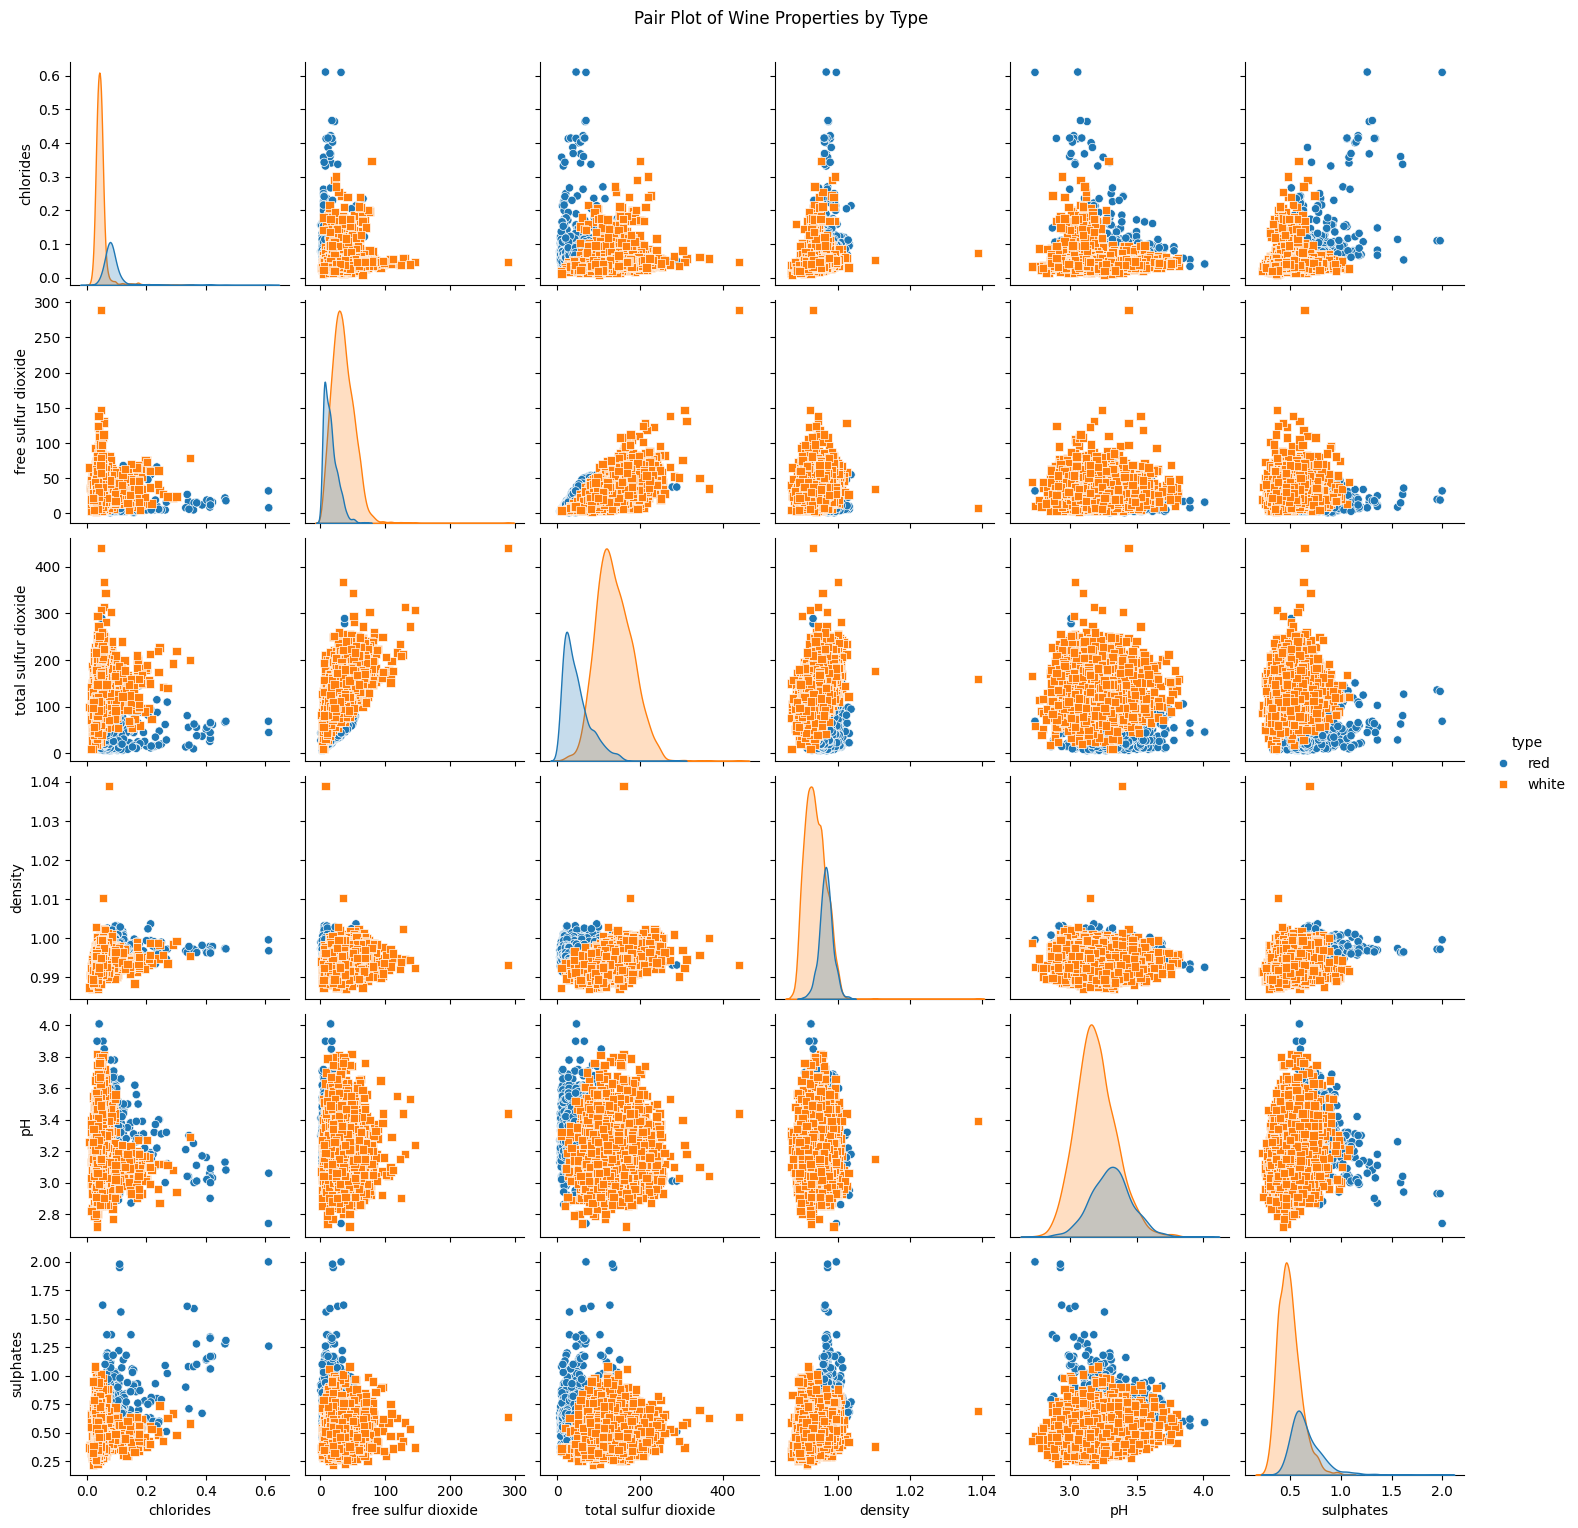

In [7]:
plot_columns = ['chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'type']

sns.pairplot(wine_data[plot_columns], hue='type', markers=['o','s'])
plt.suptitle("Pair Plot of Wine Properties by Type", y=1.02)
plt.show()

# KNN Classification

In [8]:
import pickle

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

In [9]:
# Separate the features and the target variable
X = wine_data.iloc[:, :-1].values # Features: all columns except the last one
y = wine_data.iloc[:, -1].values # Target variable: the last column

# Split the dataset into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalise the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [10]:
k = 5
knn_classifier = KNeighborsClassifier(n_neighbors=k)
knn_classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [11]:
y_pred = knn_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("\nConfusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", classification_rep)

Accuracy: 0.9924812030075187

Confusion Matrix:
 [[288   1]
 [  7 768]]

Classification Report:
               precision    recall  f1-score   support

         red       0.98      1.00      0.99       289
       white       1.00      0.99      0.99       775

    accuracy                           0.99      1064
   macro avg       0.99      0.99      0.99      1064
weighted avg       0.99      0.99      0.99      1064



In [12]:
with open ('wine_knn_classification.pkl', 'wb') as file:
    pickle.dump(knn_classifier, file)

# Linear Regression

In [13]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder

In [14]:
types = wine_data['type'].unique()
for type in types:
    print(type)

red
white


In [15]:
label_encoder = LabelEncoder()
wine_data['type'] = label_encoder.fit_transform(wine_data['type'])

In [16]:
X = wine_data.drop('quality', axis=1)
y = wine_data['quality']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

In [17]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")

Mean Squared Error: 0.5195409549124805
R^2 Score: 0.30900322384447265


In [18]:
with open('wine_linear_regression.pkl', 'wb') as file:
    pickle.dump(model, file)

# Decision Tree

In [19]:
from sklearn.tree import DecisionTreeRegressor

In [20]:
# Splitting the data into features and target variable
X = wine_data.drop('quality', axis=1)
y = wine_data['quality']

# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Decision Tree model
model = DecisionTreeRegressor(random_state=42)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

In [21]:
from sklearn import tree

text_representation = tree.export_text(model)
print(text_representation)

|--- feature_10 <= 10.92
|   |--- feature_1 <= 0.25
|   |   |--- feature_10 <= 10.12
|   |   |   |--- feature_1 <= 0.23
|   |   |   |   |--- feature_5 <= 26.50
|   |   |   |   |   |--- feature_7 <= 1.00
|   |   |   |   |   |   |--- feature_0 <= 9.10
|   |   |   |   |   |   |   |--- feature_5 <= 13.50
|   |   |   |   |   |   |   |   |--- feature_3 <= 3.20
|   |   |   |   |   |   |   |   |   |--- feature_7 <= 0.99
|   |   |   |   |   |   |   |   |   |   |--- value: [4.00]
|   |   |   |   |   |   |   |   |   |--- feature_7 >  0.99
|   |   |   |   |   |   |   |   |   |   |--- value: [5.00]
|   |   |   |   |   |   |   |   |--- feature_3 >  3.20
|   |   |   |   |   |   |   |   |   |--- value: [6.00]
|   |   |   |   |   |   |   |--- feature_5 >  13.50
|   |   |   |   |   |   |   |   |--- feature_6 <= 99.50
|   |   |   |   |   |   |   |   |   |--- feature_3 <= 1.25
|   |   |   |   |   |   |   |   |   |   |--- feature_3 <= 1.00
|   |   |   |   |   |   |   |   |   |   |   |--- value: [6.00]
|   

In [22]:
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("\nConfusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", classification_rep)

Accuracy: 0.4483082706766917

Confusion Matrix:
 [[  0   2   2   0   0   0   0]
 [  3   9  16   9   1   0   0]
 [  3  24 175 120  24   2   0]
 [  0  17 137 221  74   8   1]
 [  0   1  25  79  69  16   0]
 [  0   0   2  11   9   3   0]
 [  0   0   0   1   0   0   0]]

Classification Report:
               precision    recall  f1-score   support

           3       0.00      0.00      0.00         4
           4       0.17      0.24      0.20        38
           5       0.49      0.50      0.50       348
           6       0.50      0.48      0.49       458
           7       0.39      0.36      0.38       190
           8       0.10      0.12      0.11        25
           9       0.00      0.00      0.00         1

    accuracy                           0.45      1064
   macro avg       0.24      0.24      0.24      1064
weighted avg       0.45      0.45      0.45      1064



In [23]:
with open('wine_decision_tree.pkl', 'wb') as file:
    pickle.dump(model, file)